In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import (LogisticRegression, Perceptron,
                                  SGDClassifier)
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [41]:
train_data = pd.read_csv("data/train.tsv", sep="\t")
test_data = pd.read_csv("data/test.tsv", sep="\t")
sample = pd.read_csv("data/sample_submit.csv")

In [42]:
train_data.head(10)

,id,Tournament,Sex,Year,Player1,Player2,Round,Result,FNL.1,FNL.2,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,0,FrenchOpen,men,2013,Jarkko Nieminen,Paul-Henri Mathieu,1,1,3,2,...,5,15,24.0,33.0,163.0,4,6.0,6.0,6.0,2.0
1,3,AusOpen,women,2013,Varvara Lepchenko,Simona Halep,2,0,1,2,...,6,15,1.0,2.0,90.0,4,6.0,6.0,NaN,NaN
2,4,Wimbledon,women,2013,H.Watson,M.Keys,1,0,0,2,...,7,5,8.0,5.0,NaN,6,7.0,NaN,NaN,NaN
3,7,USOpen,women,2013,S Williams,F Schiavone,1,1,2,0,...,0,0,6.0,3.0,NaN,0,1.0,NaN,NaN,NaN
4,9,AusOpen,women,2013,Tadeja Majeric,Ajla Tomljanovic,1,0,1,2,...,3,6,NaN,NaN,97.0,3,7.0,6.0,NaN,NaN
5,11,USOpen,women,2013,C Giorgi,R Vinci,4,0,0,2,...,8,4,5.0,4.0,NaN,6,6.0,NaN,NaN,NaN
6,13,USOpen,women,2013,L Robson,C Garcia,2,1,2,0,...,2,2,10.0,7.0,NaN,4,6.0,NaN,NaN,NaN
7,16,FrenchOpen,men,2013,Lukas Lacko,Sam Querrey,1,0,0,3,...,4,7,12.0,13.0,93.0,6,6.0,6.0,NaN,NaN
8,19,USOpen,men,2013,Novak Djokovic,Mikhail Youzhny,1,1,3,1,...,2,10,10.0,21.0,87.0,3,2.0,6.0,0.0,NaN
9,23,AusOpen,men,2013,Tomas Berdych,David Ferrer,5,1,3,1,...,3,12,12.0,13.0,119.0,1,4.0,6.0,4.0,NaN


In [43]:
test_data.head()

,id,Tournament,Sex,Year,Player1,Player2,Round,FNL.1,FNL.2,FSP.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,1,Wimbledon,women,2013,A.Radwanska,M.Keys,3,2.0,1.0,71,...,10.0,2.0,34.0,22.0,NaN,5.0,6.0,3.0,NaN,NaN
1,2,AusOpen,men,2013,Nick Kyrgios,Benjamin Becker,1,3.0,1.0,54,...,3.0,7.0,6.0,6.0,114.0,3.0,7.0,2.0,6.0,NaN
2,5,Wimbledon,men,2013,V.Pospisil,M.Youzhny,2,2.0,3.0,63,...,7.0,4.0,46.0,32.0,NaN,6.0,6.0,7.0,3.0,6.0
3,6,FrenchOpen,women,2013,Caroline Wozniacki,Bojana Jovanovski,2,0.0,2.0,70,...,3.0,7.0,2.0,5.0,72.0,7.0,6.0,NaN,NaN,NaN
4,8,Wimbledon,men,2013,N.Djokovic,J.Chardy,3,3.0,0.0,74,...,0.0,0.0,23.0,12.0,NaN,3.0,2.0,2.0,NaN,NaN


In [44]:
sample.head()

,1,0
0,2,1
1,5,0
2,6,0
3,8,1
4,10,0


In [45]:
full_data = [train_data, test_data]

In [46]:
train_data.info()
print("_"*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          471 non-null    int64  
 1   Tournament  471 non-null    object 
 2   Sex         471 non-null    object 
 3   Year        471 non-null    int64  
 4   Player1     471 non-null    object 
 5   Player2     471 non-null    object 
 6   Round       471 non-null    int64  
 7   Result      471 non-null    int64  
 8   FNL.1       471 non-null    int64  
 9   FNL.2       471 non-null    int64  
 10  FSP.1       471 non-null    int64  
 11  FSW.1       471 non-null    int64  
 12  SSP.1       471 non-null    int64  
 13  SSW.1       471 non-null    int64  
 14  ACE.1       462 non-null    float64
 15  DBF.1       468 non-null    float64
 16  WNR.1       408 non-null    float64
 17  UFE.1       408 non-null    float64
 18  BPC.1       471 non-null    int64  
 19  BPW.1       471 non-null    i

In [47]:
#第4,5セットの獲得ゲーム数ST4,ST5は欠損値が多いため削除
drop_columns = ["ST4.1", "ST5.1", "ST4.2", "ST5.2"]

train_data = train_data.drop(drop_columns, axis=1)
test_data = test_data.drop(drop_columns, axis=1)

In [56]:
train_data[["Result", "ACE.1", "ACE.2"]].groupby(["Result"], as_index=False).mean()

,Result,ACE.1,ACE.2
0,0,5.345679,6.872428
1,1,7.639269,4.899543


In [57]:
train_data[["Result", "FSP.1", "FSP.2"]].groupby(["Result"], as_index=False).mean()

,Result,FSP.1,FSP.2
0,0,60.846154,62.161943
1,1,62.937500,61.477679


In [58]:
train_data[["Result", "FSW.1", "FSW.2"]].groupby(["Result"], as_index=False).mean()

,Result,FSW.1,FSW.2
0,0,37.109312,41.643725
1,1,41.616071,36.870536


In [59]:
train_data[["Result", "DBF.1", "DBF.2"]].groupby(["Result"], as_index=False).mean()

,Result,DBF.1,DBF.2
0,0,4.004098,3.483607
1,1,3.339286,4.245536


In [60]:
train_data["UFE.1"].head()

0    42.0
1    47.0
2    15.0
3     8.0
4     7.0
Name: UFE.1, dtype: float64

In [63]:
train_data[["Result", "UFE.1"]].groupby(["Result"], as_index=False).mean()

,Result,UFE.1
0,0,29.777251
1,1,26.182741


In [64]:
train_data[["Result", "BPW.1"]].groupby(["Result"], as_index=False).mean()

,Result,BPW.1
0,0,5.307692
1,1,9.183036


In [65]:
train_data[["Result", "FNL.1"]].groupby(["Result"], as_index=False).mean()

,Result,FNL.1
0,0,0.538462
1,1,2.495536


In [74]:
train_data[["Result", "SSP.1"]].groupby(["Result"], as_index=False).mean()

,Result,SSP.1
0,0,39.153846
1,1,37.107143


In [68]:
train_data["FSPW.1"] = train_data["FSP.1"] * train_data["FSW.1"]

In [75]:
train_data["FSPW.1"]

0      5796
1      2142
2       954
3       663
4      3888
       ... 
466    2146
467    3906
468    2479
469    7038
470    2496
Name: FSPW.1, Length: 471, dtype: int64

In [72]:
train_data[["Result", "FSPW.1"]].groupby(["Result"], as_index=False).mean()

,Result,FSPW.1
0,0,2284.744939
1,1,2634.727679


In [76]:
train_data[["Result", "BPW.1"]].groupby(["Result"], as_index=False).mean()

,Result,BPW.1
0,0,5.307692
1,1,9.183036


In [77]:
train_data[["Result", "TPW.1"]].groupby(["Result"], as_index=False).mean()

,Result,TPW.1
0,0,89.410405
1,1,105.112676


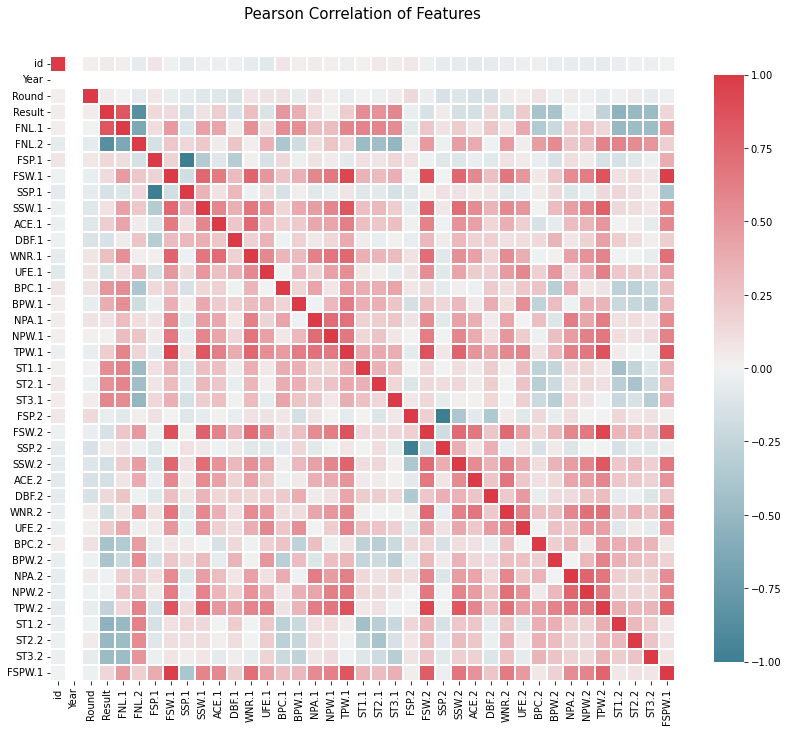

In [80]:
def correlation_heatmap(df):
    fig, ax = plt.subplots(figsize=(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig = sns.heatmap(df.corr(),
                     cmap = colormap,
                     square=True,
                     cbar_kws={"shrink":.9},
                     ax=ax,
                     linewidths=0.1, vmax=1.0, linecolor="white")
    plt.title("Pearson Correlation of Features", y=1.05, size=15)

correlation_heatmap(train_data)

In [81]:
train_data = train_data.drop("FSPW.1", axis=1)

In [82]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          471 non-null    int64  
 1   Tournament  471 non-null    object 
 2   Sex         471 non-null    object 
 3   Year        471 non-null    int64  
 4   Player1     471 non-null    object 
 5   Player2     471 non-null    object 
 6   Round       471 non-null    int64  
 7   Result      471 non-null    int64  
 8   FNL.1       471 non-null    int64  
 9   FNL.2       471 non-null    int64  
 10  FSP.1       471 non-null    int64  
 11  FSW.1       471 non-null    int64  
 12  SSP.1       471 non-null    int64  
 13  SSW.1       471 non-null    int64  
 14  ACE.1       462 non-null    float64
 15  DBF.1       468 non-null    float64
 16  WNR.1       408 non-null    float64
 17  UFE.1       408 non-null    float64
 18  BPC.1       471 non-null    int64  
 19  BPW.1       471 non-null    i

In [83]:
drop_columns = ["NPA.1", "NPA.2", "NPW.1", "NPW.2", "TPW.1", "TPW.2", "UFE.1", "UFE.2", "Year", "id", "DBF.1", "DBF.2"]

train_data = train_data.drop(drop_columns, axis=1)
test_data = test_data.drop(drop_columns, axis=1)
train_data.head()

,Tournament,Sex,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,...,FSW.2,SSP.2,SSW.2,ACE.2,WNR.2,BPC.2,BPW.2,ST1.2,ST2.2,ST3.2
0,FrenchOpen,men,Jarkko Nieminen,Paul-Henri Mathieu,1,1,3,2,69,84,...,58,46,36,7.0,60.0,5,15,4,6.0,6.0
1,AusOpen,women,Varvara Lepchenko,Simona Halep,2,0,1,2,63,34,...,29,42,16,0.0,10.0,6,15,4,6.0,6.0
2,Wimbledon,women,H.Watson,M.Keys,1,0,0,2,53,18,...,25,37,10,8.0,23.0,7,5,6,7.0,NaN
3,USOpen,women,S Williams,F Schiavone,1,1,2,0,51,13,...,8,57,5,0.0,3.0,0,0,0,1.0,NaN
4,AusOpen,women,Tadeja Majeric,Ajla Tomljanovic,1,0,1,2,72,54,...,36,51,25,5.0,5.0,3,6,3,7.0,6.0


(array([207., 124.,  62.,  37.,  16.,   5.,   8.,   0.,   1.,   2.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

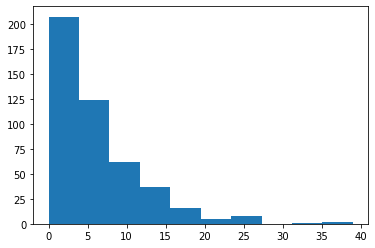

In [88]:
plt.hist(train_data["ACE.2"])

In [106]:
train_data["ACE.1"].fillna(train_data["ACE.1"].mode()[0], inplace=True)
train_data["ACE.2"].fillna(train_data["ACE.2"].mode()[0], inplace=True)

In [115]:
test_data["ACE.1"].fillna(test_data["ACE.1"].mode()[0], inplace=True)
test_data["ACE.2"].fillna(test_data["ACE.2"].mode()[0], inplace=True)

(array([ 38.,  87., 109.,  75.,  49.,  22.,  22.,   3.,   2.,   1.]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <BarContainer object of 10 artists>)

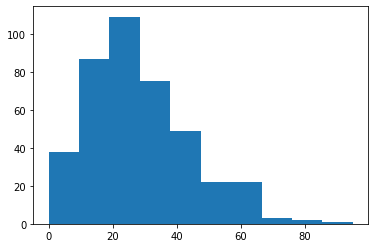

In [110]:
plt.hist(train_data["WNR.2"])

In [111]:
train_data["WNR.1"] = train_data["WNR.1"].fillna(train_data["WNR.1"].median())
train_data["WNR.2"] = train_data["WNR.2"].fillna(train_data["WNR.2"].median())
test_data["WNR.1"] = test_data["WNR.1"].fillna(test_data["WNR.1"].median())
test_data["WNR.1"] = test_data["WNR.1"].fillna(test_data["WNR.1"].median())

In [114]:
test_data["WNR.1"] = test_data["WNR.1"].fillna(test_data["WNR.1"].median())
test_data["WNR.1"] = test_data["WNR.1"].fillna(test_data["WNR.1"].median())

In [113]:
train_data.head()

,Tournament,Sex,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,...,FSW.2,SSP.2,SSW.2,ACE.2,WNR.2,BPC.2,BPW.2,ST1.2,ST2.2,ST3.2
0,FrenchOpen,men,Jarkko Nieminen,Paul-Henri Mathieu,1,1,3,2,69,84,...,58,46,36,7.0,60.0,5,15,4,6.0,6.0
1,AusOpen,women,Varvara Lepchenko,Simona Halep,2,0,1,2,63,34,...,29,42,16,0.0,10.0,6,15,4,6.0,6.0
2,Wimbledon,women,H.Watson,M.Keys,1,0,0,2,53,18,...,25,37,10,8.0,23.0,7,5,6,7.0,NaN
3,USOpen,women,S Williams,F Schiavone,1,1,2,0,51,13,...,8,57,5,0.0,3.0,0,0,0,1.0,NaN
4,AusOpen,women,Tadeja Majeric,Ajla Tomljanovic,1,0,1,2,72,54,...,36,51,25,5.0,5.0,3,6,3,7.0,6.0


(array([ 10.,  30.,  47.,   0.,  42.,  50.,   0.,  17., 210.,  63.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

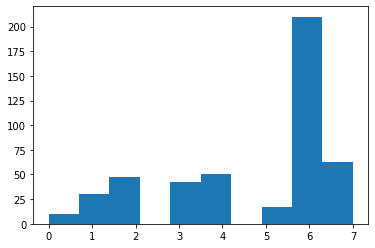

In [117]:
plt.hist(train_data["ST2.2"])

In [127]:
train_data[["Result", "ST2.1"]].groupby(["Result"], as_index=False).median()

,Result,ST2.1
0,0,4.0
1,1,6.0


In [128]:
train_data[["Result", "ST3.1"]].groupby(["Result"], as_index=False).median()

,Result,ST3.1
0,0,4.0
1,1,6.0


In [123]:
train_data.loc[(train_data["Result"] == 0) & (train_data["ST2.1"].isnull()), "ST2.1"] = 4.0
train_data.loc[(train_data["Result"] == 1) & (train_data["ST2.1"].isnull()), "ST2.1"] = 6.0

In [124]:
test_data.loc[(test_data["Result"] == 0) & (test_data["ST2.1"].isnull()), "ST2.1"] = 4.0
test_data.loc[(test_data["Result"] == 1) & (test_data["ST2.1"].isnull()), "ST2.1"] = 6.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  471 non-null    object 
 1   Sex         471 non-null    object 
 2   Player1     471 non-null    object 
 3   Player2     471 non-null    object 
 4   Round       471 non-null    int64  
 5   Result      471 non-null    int64  
 6   FNL.1       471 non-null    int64  
 7   FNL.2       471 non-null    int64  
 8   FSP.1       471 non-null    int64  
 9   FSW.1       471 non-null    int64  
 10  SSP.1       471 non-null    int64  
 11  SSW.1       471 non-null    int64  
 12  ACE.1       471 non-null    float64
 13  WNR.1       471 non-null    float64
 14  BPC.1       471 non-null    int64  
 15  BPW.1       471 non-null    int64  
 16  ST1.1       471 non-null    int64  
 17  ST2.1       471 non-null    float64
 18  ST3.1       314 non-null    float64
 19  FSP.2       471 non-null    i

In [141]:
train_data["ST2.2"].fillna(train_data["ST2.2"].mean(), inplace=True)
test_data["ST2.2"].fillna(test_data["ST2.2"].mean(), inplace=True)

In [136]:
train_data[["Result", "Tournament"]].groupby(["Tournament"], as_index=False).count()

,Tournament,Result
0,AusOpen,132
1,FrenchOpen,120
2,USOpen,97
3,Wimbledon,122


In [132]:
train_data.drop("Sex", axis=1, inplace=True)

In [137]:
test_data.drop("Sex", axis=1, inplace=True)

In [138]:
drop_columns = ["Tournament", "Player1", "Player2", "Round"]
train_data.drop(drop_columns, axis=1, inplace=True)
test_data.drop(drop_columns, axis=1, inplace=True)

In [139]:
train_data["ST3.1"].fillna(train_data["ST3.1"].mean(), inplace=True)
train_data["ST3.2"].fillna(train_data["ST3.2"].mean(), inplace=True)
test_data["ST3.1"].fillna(test_data["ST3.1"].mean(), inplace=True)
test_data["ST3.2"].fillna(test_data["ST3.2"].mean(), inplace=True)

In [142]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Result  471 non-null    int64  
 1   FNL.1   471 non-null    int64  
 2   FNL.2   471 non-null    int64  
 3   FSP.1   471 non-null    int64  
 4   FSW.1   471 non-null    int64  
 5   SSP.1   471 non-null    int64  
 6   SSW.1   471 non-null    int64  
 7   ACE.1   471 non-null    float64
 8   WNR.1   471 non-null    float64
 9   BPC.1   471 non-null    int64  
 10  BPW.1   471 non-null    int64  
 11  ST1.1   471 non-null    int64  
 12  ST2.1   471 non-null    float64
 13  ST3.1   471 non-null    float64
 14  FSP.2   471 non-null    int64  
 15  FSW.2   471 non-null    int64  
 16  SSP.2   471 non-null    int64  
 17  SSW.2   471 non-null    int64  
 18  ACE.2   471 non-null    float64
 19  WNR.2   471 non-null    float64
 20  BPC.2   471 non-null    int64  
 21  BPW.2   471 non-null    int64  
 22  ST

In [145]:
X_train = train_data.drop("Result", axis=1)
y_train = train_data.loc[:, "Result"]

In [146]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.9363057324840764

In [147]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

C:\Users\YAGA0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [148]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9235668789808917

In [149]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian.score(X_train, y_train)

0.9723991507430998

In [150]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree.score(X_train, y_train)

1.0